In [ ]:
import pandas as pd

# Create a sample dataframe for sentiment analysis
data = {
    "text": [
        "I love this product! It's amazing.",
        "This is the worst experience I've ever had.",
        "The movie was okay, not too bad but not great either.",
        "Absolutely fantastic service, very satisfied!",
        "I'm not happy with the quality of the item.",
        "It's an average place, nothing special.",
        "The support team was helpful and resolved my issue quickly.",
        "I don't recommend this to anyone. Waste of money.",
        "Had a wonderful time at the restaurant. Great food and ambiance!",
        "Not sure if I would buy this again, it's just alright."
    ],
    "sentiment": [
        "positive", "negative", "neutral", "positive", "negative",
        "neutral", "positive", "negative", "positive", "neutral"
    ]
}

# Convert the data into a pandas DataFrame
sample_df = pd.DataFrame(data)

# Save the DataFrame as a CSV file
sample_df.to_csv("sample_sentiment_data.csv", index=False)

print("Sample sentiment analysis CSV file has been created!")


Sample sentiment analysis CSV file has been created!


In [ ]:
# Load the CSV file
sentiment_data = pd.read_csv("sample_sentiment_data.csv")

# Display the first few rows of the dataset
print(sentiment_data.head())


                                                text sentiment
0                 I love this product! It's amazing.  positive
1        This is the worst experience I've ever had.  negative
2  The movie was okay, not too bad but not great ...   neutral
3      Absolutely fantastic service, very satisfied!  positive
4        I'm not happy with the quality of the item.  negative


                                                text sentiment
0                 I love this product! It's amazing.  positive
1        This is the worst experience I've ever had.  negative
2  The movie was okay, not too bad but not great ...   neutral
3      Absolutely fantastic service, very satisfied!  positive
4        I'm not happy with the quality of the item.  negative


<ipython-input-5-05c895b08bc4>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=sentiment_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


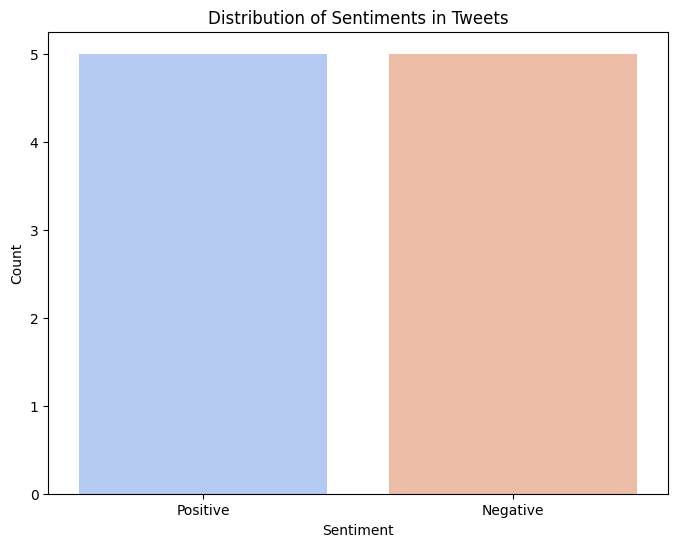

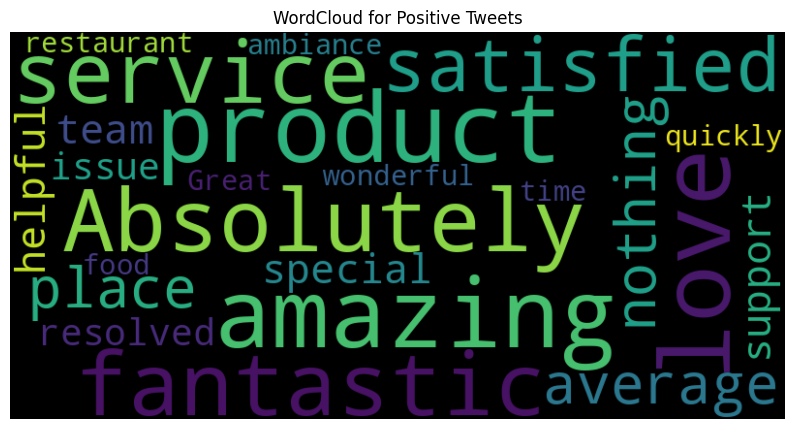

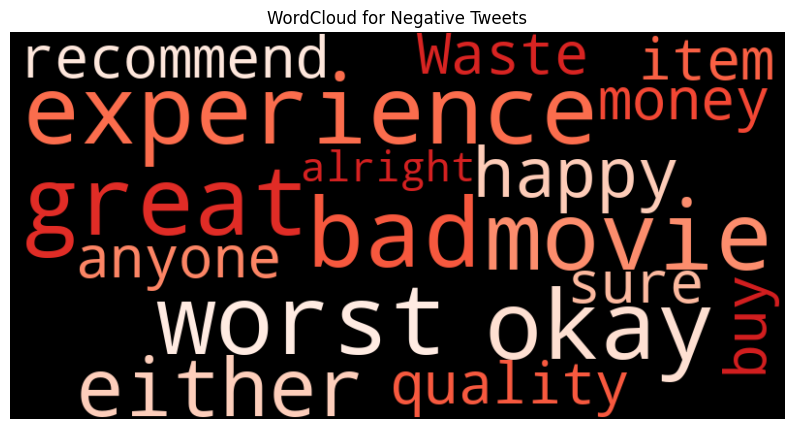

                                                text sentiment  \
0                 I love this product! It's amazing.  positive   
1        This is the worst experience I've ever had.  negative   
2  The movie was okay, not too bad but not great ...   neutral   
3      Absolutely fantastic service, very satisfied!  positive   
4        I'm not happy with the quality of the item.  negative   

                                        cleaned_text Sentiment  
0                 I love this product! It's amazing.  Positive  
1        This is the worst experience I've ever had.  Negative  
2  The movie was okay, not too bad but not great ...  Negative  
3      Absolutely fantastic service, very satisfied!  Positive  
4        I'm not happy with the quality of the item.  Negative  


<ipython-input-5-05c895b08bc4>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=sentiment_data, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


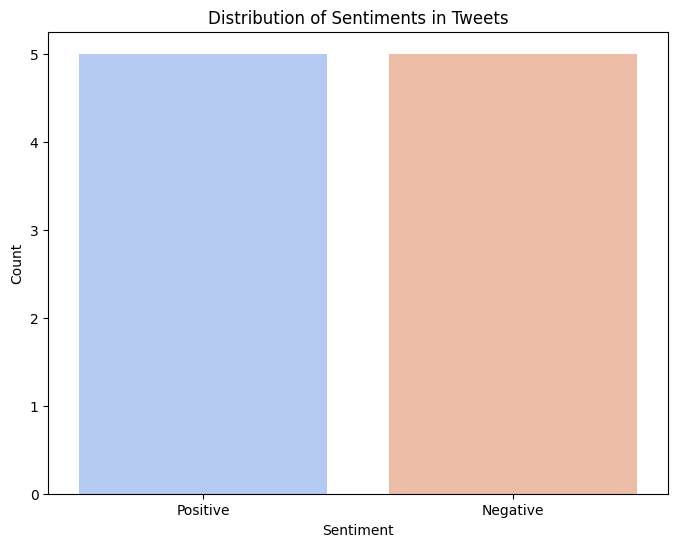

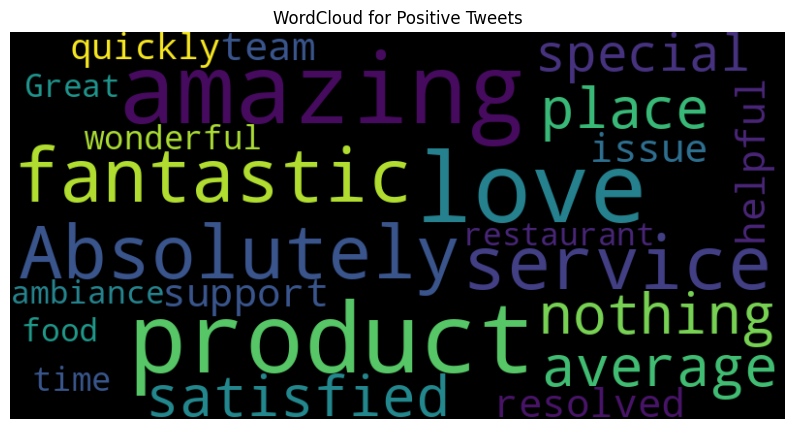

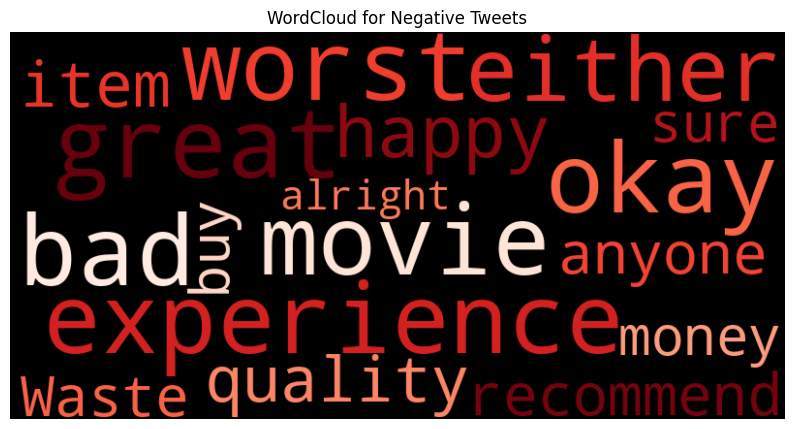

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

# Load the dataset
# Download the dataset from the link and provide the path to the CSV file
data_path = 'sentiment140.csv' # Replace with your file path
columns = ['target', 'id', 'date', 'flag', 'user', 'text']
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

# Load the dataset
# Download the dataset from the link and provide the path to the CSV file
 # Replace with your file path
sentiment_data = pd.read_csv("sample_sentiment_data.csv")

# Display the first few rows of the dataset
print(sentiment_data.head())

# Clean the tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Remove @mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtag symbol
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)  # Remove hyperlinks
    return tweet

# Apply cleaning
sentiment_data['cleaned_text'] = sentiment_data['text'].apply(clean_tweet)

# Perform Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

sentiment_data['Sentiment'] = sentiment_data['cleaned_text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=sentiment_data, palette='coolwarm')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Wordcloud for positive and negative tweets
from wordcloud import WordCloud

positive_tweets = ' '.join(sentiment_data[sentiment_data['Sentiment'] == 'Positive']['cleaned_text'])
negative_tweets = ' '.join(sentiment_data[sentiment_data['Sentiment'] == 'Negative']['cleaned_text'])

# Generate wordcloud for positive tweets
plt.figure(figsize=(10, 8))
wordcloud_positive = WordCloud(width=800, height=400, max_font_size=100).generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('WordCloud for Positive Tweets')
plt.axis('off')
plt.show()

# Generate wordcloud for negative tweets
plt.figure(figsize=(10, 8))
wordcloud_negative = WordCloud(width=800, height=400, max_font_size=100, colormap='Reds').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('WordCloud for Negative Tweets')
plt.axis('off')
plt.show()


# Display the first few rows of the dataset
print(sentiment_data.head())

# Clean the tweets
def clean_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9]+', '', tweet)  # Remove @mentions
    tweet = re.sub(r'#', '', tweet)  # Remove hashtag symbol
    tweet = re.sub(r'RT[\s]+', '', tweet)  # Remove RT
    tweet = re.sub(r'https?:\/\/\S+', '', tweet)  # Remove hyperlinks
    return tweet

# Apply cleaning
sentiment_data['cleaned_text'] = sentiment_data['text'].apply(clean_tweet)

# Perform Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

sentiment_data['Sentiment'] = sentiment_data['cleaned_text'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=sentiment_data, palette='coolwarm')
plt.title('Distribution of Sentiments in Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Wordcloud for positive and negative tweets
from wordcloud import WordCloud

positive_tweets = ' '.join(sentiment_data[sentiment_data['Sentiment'] == 'Positive']['cleaned_text'])
negative_tweets = ' '.join(sentiment_data[sentiment_data['Sentiment'] == 'Negative']['cleaned_text'])

# Generate wordcloud for positive tweets
plt.figure(figsize=(10, 8))
wordcloud_positive = WordCloud(width=800, height=400, max_font_size=100).generate(positive_tweets)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('WordCloud for Positive Tweets')
plt.axis('off')
plt.show()

# Generate wordcloud for negative tweets
plt.figure(figsize=(10, 8))
wordcloud_negative = WordCloud(width=800, height=400, max_font_size=100, colormap='Reds').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('WordCloud for Negative Tweets')
plt.axis('off')
plt.show()
